In [3]:
!apt install python3-rtree
!pip install osmnx
import osmnx as ox
import folium 
import pandas as pd
!pip uninstall matplotlib
!pip install matplotlib==3.1.3
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 40 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.3
     |████████████████████████████████| 13.1 MB 87 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires m

In [17]:
#Collect all the data from osm api
# data inlcudes Building Footprints,Edges,Nodes  
gdf = ox.geocoder.geocode_to_gdf("Northridge, Los Angeles")
G=ox.graph_from_place(' Northridge,Los Angeles')
footprints=ox.geometries.geometries_from_place("Northridge,Los Angeles", tags={"building":True})
#Extract all edges and nodes
nodes, edges = ox.graph_to_gdfs(G)
box = gdf[["bbox_north", "bbox_south", "bbox_east", "bbox_west"]]

In [20]:
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-118.56428 34.26059, -118.56426 34.2...",34.278403,34.22038,-118.491475,-118.564275,306436970,relation,7753455,34.234561,-118.536932,"Northridge, Los Angeles, California, United St...",boundary,administrative,0.728973


In [21]:
box

,bbox_north,bbox_south,bbox_east,bbox_west
0,34.278403,34.22038,-118.491475,-118.564275


In [22]:
import numpy as np
# Extract 20  evenly spaced points   between north and south and east and west 
# To make a grid of 20*20 
latitudes = np.linspace( box ["bbox_north"].iloc[0],  box["bbox_south"].iloc[0], 20)
longitudes = np.linspace( box["bbox_west"].iloc[0],  box["bbox_east"].iloc[0], 20)

In [23]:
print(latitudes,longitudes)

[34.2784028  34.27534898 34.27229517 34.26924135 34.26618754 34.26313372
 34.26007991 34.25702609 34.25397227 34.25091846 34.24786464 34.24481083
 34.24175701 34.23870319 34.23564938 34.23259556 34.22954175 34.22648793
 34.22343412 34.2203803 ] [-118.5642751  -118.56044349 -118.55661189 -118.55278028 -118.54894868
 -118.54511707 -118.54128547 -118.53745386 -118.53362226 -118.52979065
 -118.52595905 -118.52212744 -118.51829584 -118.51446423 -118.51063263
 -118.50680102 -118.50296942 -118.49913781 -118.49530621 -118.4914746 ]


In [10]:
buildings_count = np.zeros(( len(latitudes)-1 ,  len(longitudes)-1 ))
# initlaize 2d array to store the building density 

In [ ]:
for i in range(len(latitudes)-1):
  for j in range(len(longitudes)-1):
    north = latitudes[i]
    south = latitudes[i+1]
    east = longitudes[j+1]
    west = longitudes[j]
   
 #THE intial boundary is divided in gird of 20*20 and then each grid box is iterated to find the buidling dnesity in the same    
 
    # Find buildings within this grid cell
    buildings=ox.geometries.geometries_from_bbox(north, south, east, west, tags={"building":True}) 
      # Count the number of buildings and store it
    no_buildings = int(buildings.shape[0])
    buildings_count[i][j] = no_buildings
    #print(buildings_count,i,j)

Streaming output truncated to the last 5000 lines.
 [  0.   0.   0.   1.   0.   0.   2.  49. 115. 156. 197. 128. 171. 135.
  117.  48.  75.  61.  56.]
 [  0.   1.   0.   9.   0.   0.  10.  49. 158. 163.  90.  73.  98. 101.
  110.  78.  99.  79.  70.]
 [  0.   0.   0.   0.   0.   1.  32.  87. 169. 166. 118. 110.  97.  58.
  131. 109. 121.  82.  62.]
 [  0.   0.   0.   0.   0.   5.  43. 142. 141. 140.  76.  94.  84.  90.
  140. 191. 151. 112.  84.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   

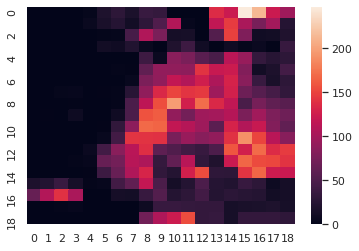

In [ ]:
import seaborn as sns; 
sns.set_theme()
ax = sns.heatmap(buildings_count)
#ax.savefig('heatmap.png')

In [ ]:
buildings_count.astype(int)

array([[  0,   0,   0,   0,   3,  20,  29,  18,  37,  34,   0,   0,   0,
        137, 123, 247, 214, 123,  97],
       [  0,   0,   0,   0,   6,  17,  25,  12,  30,  52, 109,   4,   0,
        117, 146, 104,  76, 100,  25],
       [  0,   0,   0,   0,   0,   2,   3,  46, 108,  77,  14,  15,   0,
         54, 149,  80,  11,  12,  21],
       [  0,   0,   0,   0,   0,  12,  10,  22,   6,   0,  21,  40,  11,
          0,  10,   3,   7,   1,  36],
       [  0,   0,   0,   0,   0,   0,   0,   0,  40,   7,  85,  77,  57,
         48, 113,  93,  34,  26,  29],
       [  0,   0,   0,   0,   0,   0,   2,   1,  61,  90,  89,  88, 141,
        121, 124,  82,  12,  19,  44],
       [  0,   0,   0,   0,   0,   0,   0,   5,  78,  89, 118, 109, 127,
        106, 131,  85,  37,  17,  29],
       [  0,   0,   3,   4,   0,   1,   2,  27,  89, 135, 151, 142, 145,
         97, 129,  69,  55,  45,  32],
       [  0,   0,   0,   1,   0,   0,   2,  49, 115, 156, 197, 128, 171,
        135, 117,  48,  75,  61

In [19]:
buildings_count=buildings_count.to_numpy()

In [ ]:
lat=[]
long=[]
density=[]
for i in range(19):
  
  for j in range(19):
    lat.append(latitudes[i])
    long.append(longitudes[j])
    density.append(buildings_count[i][j])

In [ ]:
df=pd.DataFrame()
df["lat"]=lat
df["long"]=long
df["density"]=density
df.shape

(361, 3)

In [ ]:
den_100 = df.query('density <= 100')
den_200 = df.query('density > 100 and density <= 200')
den_300 = df.query('density >200')

In [ ]:
point = df.loc[0]
geo_map = folium.Map((34.234561	,-118.536932), zoom_start = 14)
heat_df_100= den_100[['lat', 'long']]
heat_df_200 = den_200[['lat', 'long']]
heat_df_300 = den_300[['lat', 'long']]
from folium import plugins

geo_map.add_child(plugins.HeatMap(heat_df_100.to_numpy(), radius = 25, min_opacity = 0.7, gradient = {0.4: 'blue', 0.65: 'blue', 1: 'lime'}))
geo_map.add_child(plugins.HeatMap(heat_df_200.to_numpy(), radius = 25, min_opacity = 0.7, gradient = {0.2: 'lime', 0.0: 'lime', 1: 'red'}))
geo_map.add_child(plugins.HeatMap(heat_df_300.to_numpy(), radius = 25, min_opacity = 0.7, gradient = {0.4: 'red', 0.65: 'red', 1: 'red'}))
geo_map.save('map.png')


In [ ]:
geo_map

In [24]:
# Compare the each edge to the corrdinates of gird box and find the correct grid box where they lie 
z=0
b=0
edges["Building"]=0
for i in range(edges.shape[0]):
  a=edges["geometry"].iloc[i].bounds
  z=0
  b=0
  
  for z in range(len(latitudes)-1):
    # check in which grid does each edge belong by comparing there geometry 
    if(latitudes[z]>=a[1]>=latitudes[z+1]):
      first=z
      break
  for b in range(len(longitudes)-1):
    if(longitudes[b]<=a[0]<=longitudes[b+1]):
      second=b
      break
  # Building_density around the edge 
  edges["Building"].iloc[i]=buildings_count[z][b]
  print(i,z,b)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Streaming output truncated to the last 5000 lines.
17335 10 11
17336 10 11
17337 10 11
17338 10 11
17339 10 11
17340 8 2
17341 8 3
17342 7 2
17343 7 2
17344 1 4
17345 1 4
17346 1 4
17347 1 4
17348 1 4
17349 1 4
17350 16 4
17351 16 4
17352 16 3
17353 16 4
17354 16 4
17355 16 4
17356 16 3
17357 16 3
17358 16 3
17359 16 3
17360 16 3
17361 16 3
17362 16 3
17363 16 3
17364 16 3
17365 16 3
17366 16 3
17367 16 4
17368 16 3
17369 16 3
17370 16 4
17371 16 4
17372 16 4
17373 16 4
17374 16 4
17375 16 4
17376 16 4
17377 16 4
17378 16 4
17379 16 4
17380 16 4
17381 16 4
17382 16 4
17383 16 4
17384 16 4
17385 16 4
17386 16 4
17387 16 4
17388 16 4
17389 16 4
17390 16 4
17391 16 4
17392 17 9
17393 17 9
17394 17 9
17395 16 8
17396 16 9
17397 17 9
17398 17 9
17399 16 9
17400 16 9
17401 16 9
17402 16 9
17403 16 9
17404 16 9
17405 16 9
17406 16 9
17407 16 9
17408 16 9
17409 16 9
17410 16 9
17411 16 9
17412 16 9
17413 16 9
17414 16 9
17415 16 9
17416 17 9
17417 17 9
17418 17 9
17419 17 9
17420 17 9
17421 16

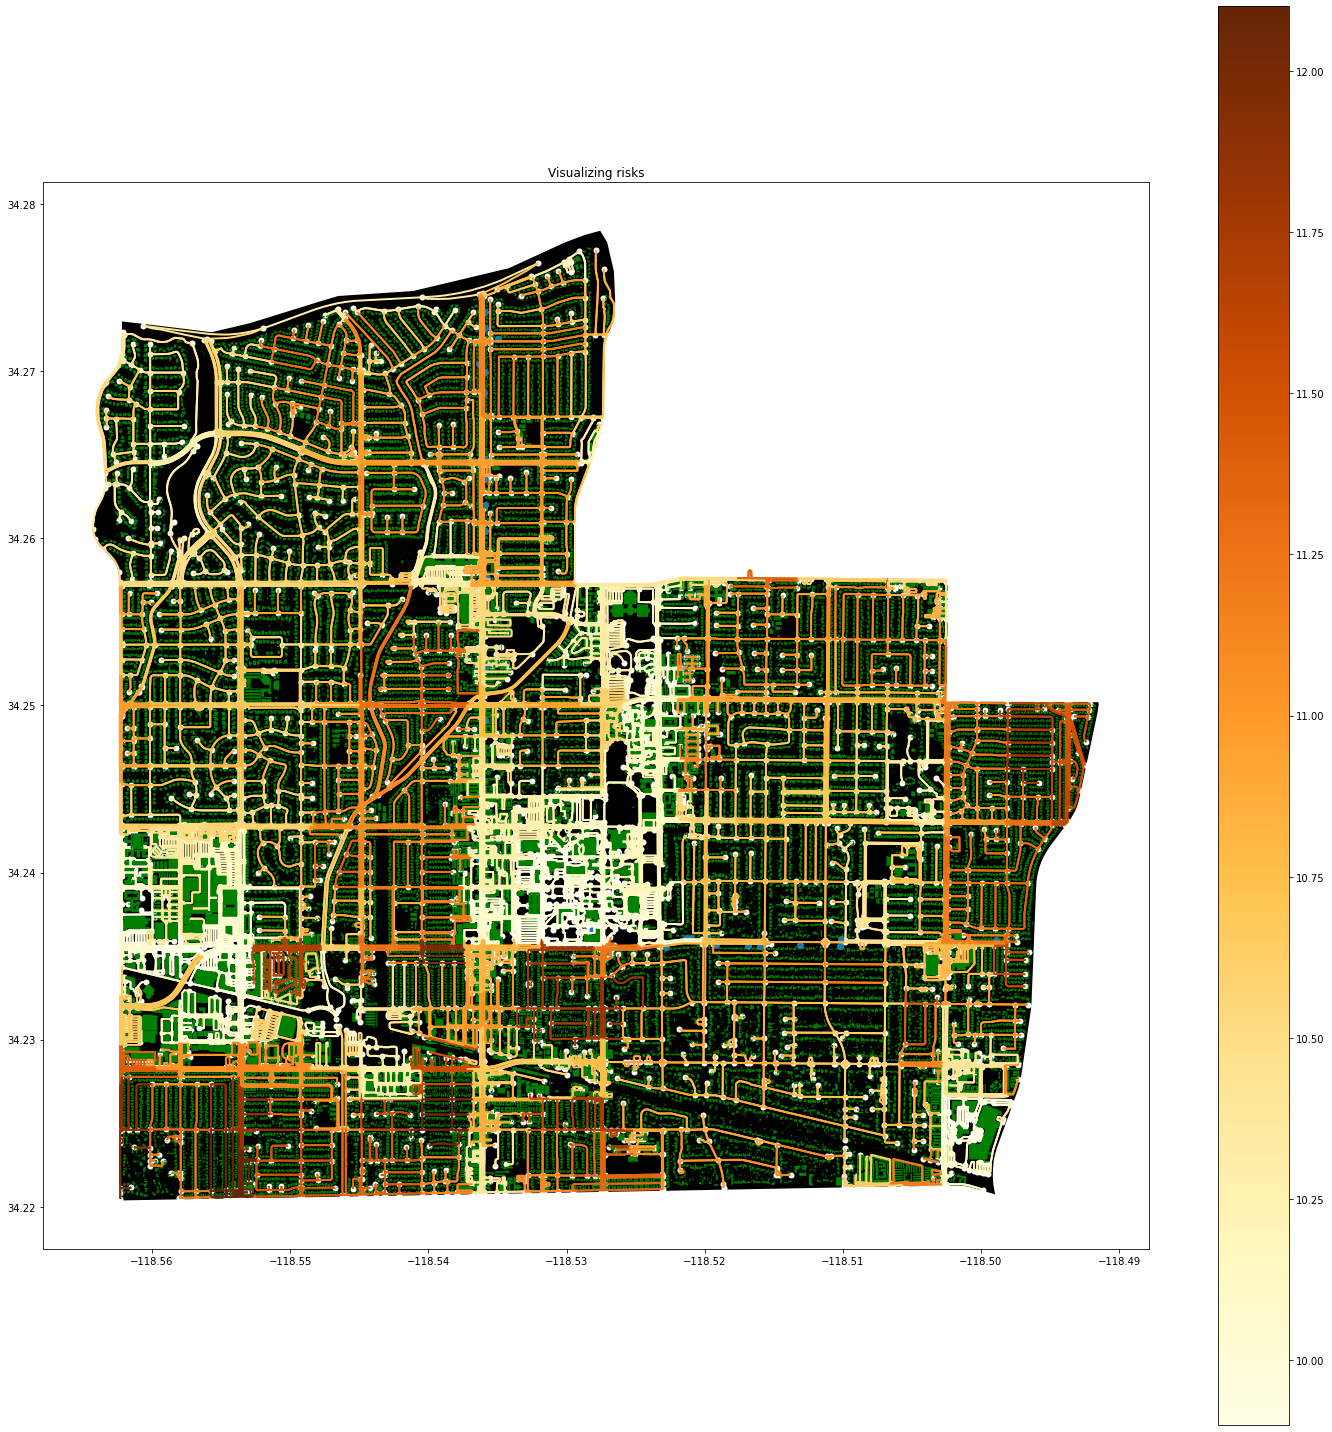

In [25]:
    import matplotlib.pyplot as plt
    import matplotlib
    #footprints=ox.geometries.geometries_from_place("Northridge Los Angeles", tags={"building":True})
    fig, ax = plt.subplots(figsize=(20, 20))
    gdf.plot(ax=ax, facecolor='black')
    edges.plot(ax=ax, linewidth=2, column='Building', cmap='YlOrBr')
    nodes.plot(ax=ax, linewidth=0, facecolor='white')
    footprints.plot(ax=ax,facecolor='green')
    sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm = matplotlib.colors.Normalize(vmin=edges['Building'].min(), vmax=edges['Building'].min()))
    sm.set_array([])
    fig.colorbar(sm, ax=ax)
    ax.set_title('Visualizing risks')
    fig.tight_layout()
    fig.savefig('plot.png')

In [ ]:
import networkx as nx
s=ox.utils_graph.graph_from_gdfs(nodes,edges)
nx.write_gpickle(s, "1_2_chatswordh_graph_building_density_risk_addded.pickle")
# Convert the updated nodes and edges to grapg and store it as a pickle fie 

/usr/local/lib/python3.7/dist-packages/networkx/utils/decorators.py:5: DeprecationWarning: write_gpickle is deprecated and will be removed in 3.0.Use ``pickle.dump(G, path, protocol)``
  import warnings
